<hr />

<center><h1> Deep Learning Theory - IFSC 7325-9U1</h1></center>
<center><h2>NLP Project in Python</h2></center><br />
<center><h4>Presented by:</h4></center>
<center><em>Christopher S. Bennett</em></center><br />
<center><h4>Professor:</h4></center>
<center><em>Dr. Xiaowei Xu </em></center><br />
<center><h4>Teaching Assistant:</h4></center>
<center><em>Hanuman Lakamsani</em></center><br />
<center><em>University of Arkansas Little Rock </em></center>
<center><em>Department of Information Science </em></center>
<center><em>Donaghey College of Science,Technology, Engineering, and Mathematics </em></center>
<center><em>Spring 2023 Semester</em></center>

<hr />

## Section 1 : Data Importation and Exploration

### 1.1 Importing key python libraries

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.2 MB/s eta 0:00:00


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import backend as k
import keras
import gc

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from sklearn.model_selection import train_test_split 
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
#from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.python.client import device_lib
from transformers import AutoTokenizer, TFBertModel

SEED = 10


### 1.2 Mounting Googe drive, loading and exploring the dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/data/All_Beauty.json/All_Beauty.json' './All_Beauty.json'

Mounted at /content/gdrive


In [4]:
# Load in data
df = pd.read_json('All_Beauty.json',lines=True)

In [5]:
# Examine the dimensions of the data
df.shape

(371345, 12)

In [6]:
# Examining the first five rows of the dataset
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [7]:
#Examining the unique values of the Overall attribute which contains the numerical values assigned to each review
df.overall.unique()

array([1, 4, 5, 2, 3])

In [8]:
# Examining the distribution of records across various review scores
df['overall'].value_counts()

5    229549
4     52687
1     39261
3     29555
2     20293
Name: overall, dtype: int64

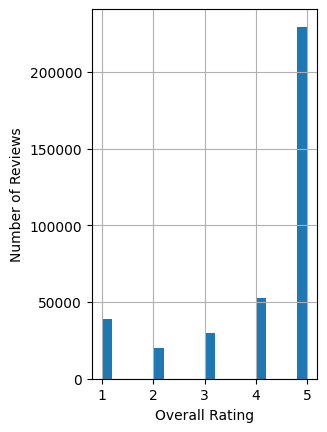

In [9]:
 import matplotlib.pyplot as plt
 plt.subplot(1, 2, 2)
fig = df['overall'].hist(bins=20)
fig.set_ylabel('Number of Reviews')
fig.set_xlabel('Overall Rating')

plt.show()

In [10]:
# Populating a new column called "text" with data from the "reviewText" column
df['text'] = df['reviewText'] 

In [11]:
# Recoding the reviews as positive and negative sentiments and placing the values in to a new variable called "Sentiments"
df["Sentiment"] = df["overall"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})

In [12]:
#Examing the first five rows of the new dataframe
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,text,Sentiment
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN,great,0
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN,My husband wanted to reading about the Negro ...,1
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN,"This book was very informative, covering all a...",1
3,5,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN,I am already a baseball fan and knew a bit abo...,1
4,5,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN,This was a good story of the Black leagues. I ...,1


In [13]:
# Assigning the values of the "Sentiments" column to a new column called "target" which will serve as the outcome variable in the NLP model
df['target'] = df['Sentiment'] 

In [14]:
# Check the dimensions of  the new dataframe
df.shape


(371345, 15)

In [15]:
# checking the last five records of the dataframe
df.tail(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,text,Sentiment,target
371340,1,True,"07 20, 2017",A202DCI7TV1022,B01HJEGTYK,Sam,It was awful. It was super frizzy and I tried ...,It was super frizzy and I tried to comb it and...,1500508800,NaN,NaN,NaN,It was awful. It was super frizzy and I tried ...,0,0
371341,5,True,"03 16, 2017",A3FSOR5IJOFIBE,B01HJEGTYK,TYW,I was skeptical about buying this. Worried it...,Awesome,1489622400,34,NaN,NaN,I was skeptical about buying this. Worried it...,1,1
371342,5,True,"03 1, 2017",A1B5DK6CTP2P24,B01HJEGTYK,Norma Jennings,Makes me look good fast.,Five Stars,1488326400,46,NaN,NaN,Makes me look good fast.,1,1
371343,2,True,"02 21, 2017",A23OUYS5IRMJS9,B01HJEGTYK,Lee,Way lighter than photo\nNot mix blend of color...,Ok but color way off and volume as well,1487635200,NaN,NaN,NaN,Way lighter than photo\nNot mix blend of color...,0,0
371344,2,True,"12 15, 2016",A24KQ9RVU81L87,B01HJEGTYK,Season341,No return instructions/phone # in packaging. ...,Might return for a replacement if I could.,1481760000,NaN,NaN,NaN,No return instructions/phone # in packaging. ...,0,0


In [16]:
# Converting the review text to lowercase
df['text']=df['text'].str.lower()

In [17]:
#Extracting the "text" and "target" columns into a new dataframe
df2 = df[["text", "target"]]

In [18]:
# Examining the distribution of the observations between the target variable in terms of actual count/frequency
df2['target'].value_counts()

1    311791
0     59554
Name: target, dtype: int64

(371345, 2)

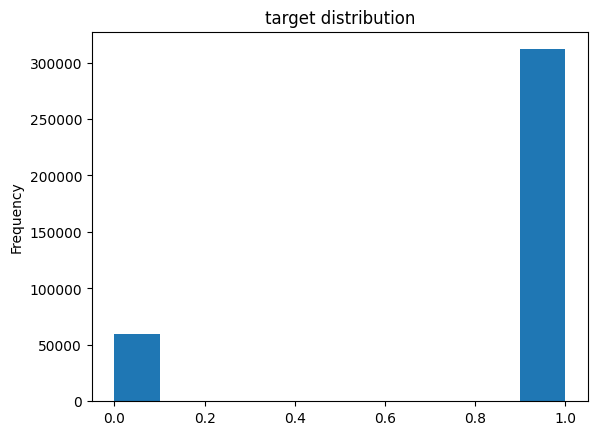

In [19]:
df2.target.plot(kind='hist', title='target distribution')
df2.shape

As is evidenced above, there exists a hugh imbalance in the distribution of records between the positive and negative sentiments; this will be remedied by oversampling the minority class and undersampling the majority class

In [20]:
#Checking the data types
df2.dtypes

text      object
target     int64
dtype: object

**Undersamplimng the majority class**

In [21]:
# Subsetting all the events
events = df2[df2.target==1]

In [22]:
events.shape

(311791, 2)

In [23]:
# Subsetting all the non-events
non_events = df2[df2.target==0]
non_events.shape

(59554, 2)

In [24]:
events.shape, non_events.shape

((311791, 2), (59554, 2))

In [25]:
# Taking a Random Sample of  59554 observations from the events dataset
# you can use random_state for reproducibility
events1 = events.sample(n=59554, random_state=2)

In [26]:
#Combining the events and non-events datasets
df3 = non_events.append(events1, ignore_index=True )

<ipython-input-26-bb9693d98f9e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = non_events.append(events1, ignore_index=True )


In [27]:
# Checking the shape of the rebalanced dataframe
df3.shape

(119108, 2)

In [28]:
df3.head()

,text,target
0,great,0
1,i didn't like this product it smudged all unde...,0
2,it burns your eyes when u put it on and very ...,0
3,"smaller versions, not full size as shown in pics",0
4,the brush side was too small for my brush. but...,0


In [29]:
# using isnull() function  to  check for missing values in the dataframe
df3.isnull().sum(axis = 0)

text      121
target      0
dtype: int64

In [30]:
# Removing rows with missing values
df3.dropna(inplace=True)

In [31]:
# using isnull() function  to check whether the change too effect
df3.isnull().sum(axis = 0)

text      0
target    0
dtype: int64

**Word cloud for negative sentiments**

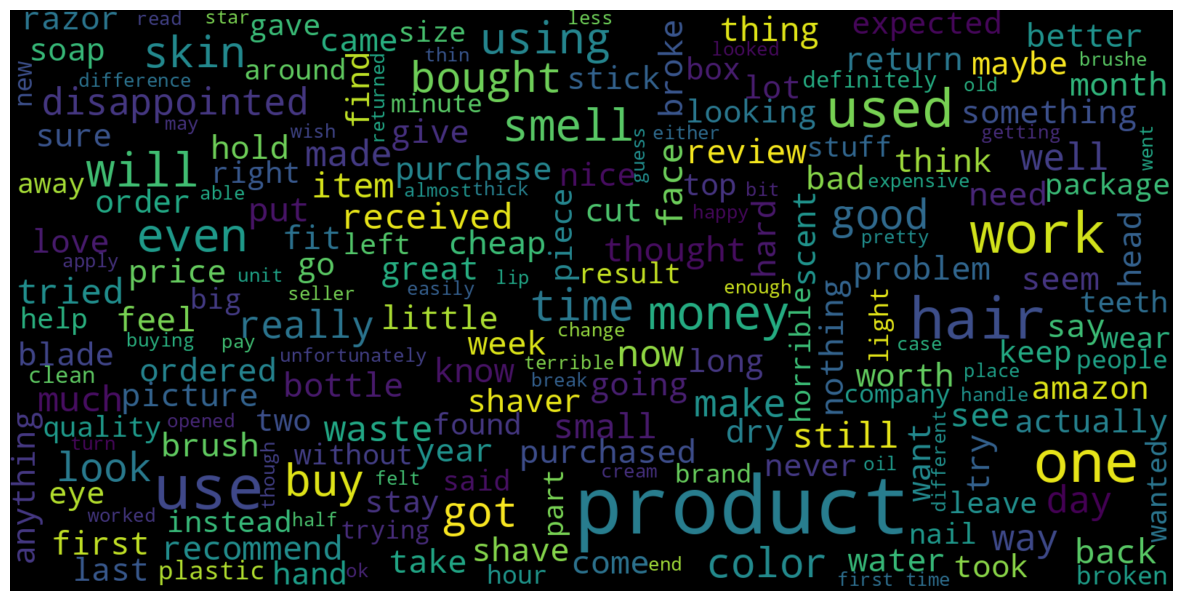

In [32]:
from wordcloud import WordCloud
consolidated=' '.join(word for word in df3['text'][df3['target']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

**Word cloud for positive sentiments**

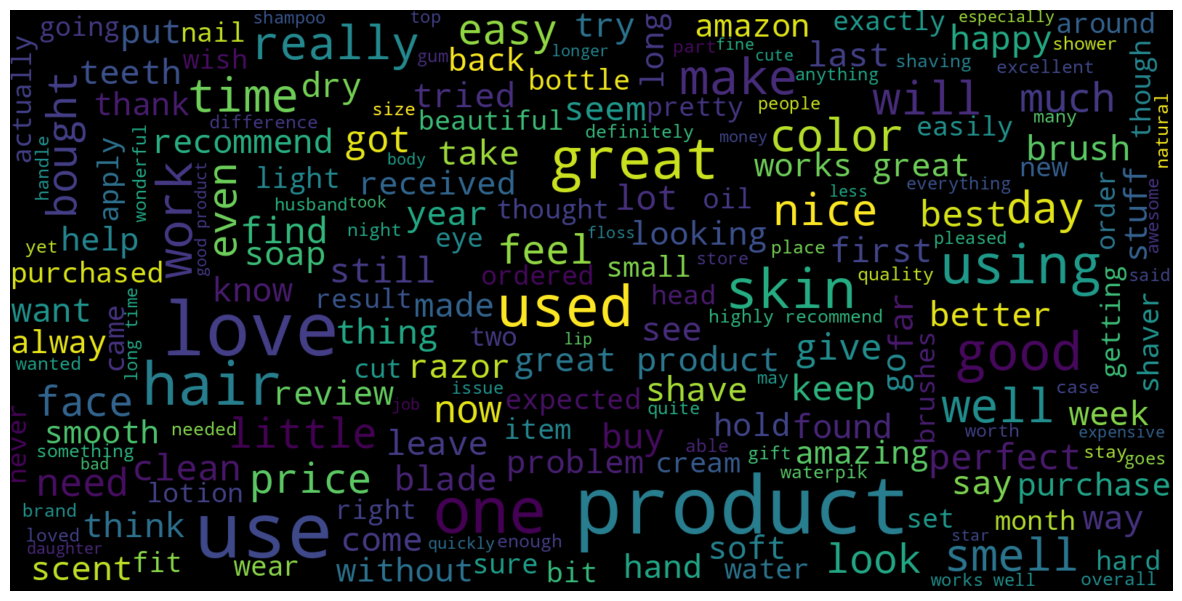

In [33]:
from wordcloud import WordCloud
consolidated=' '.join(word for word in df3['text'][df3['target']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
# Assigning the "text" and "target" attributes to "X" and "Y" variables respectively
X = df3['text']
y = df3['target']

In [35]:
#Calculating the number of words in each text string and putting the result into a new attribute called "num_words"
df3['num_words'] = df3['text'].apply(lambda x: len(x.split()))


In [36]:
#Checking the distribution of records across  the outcome attribute in the rebalanced dataframe
df3['target'].value_counts()

0    59510
1    59477
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribution of Negative - 0 /Positive - 1 Reviews')

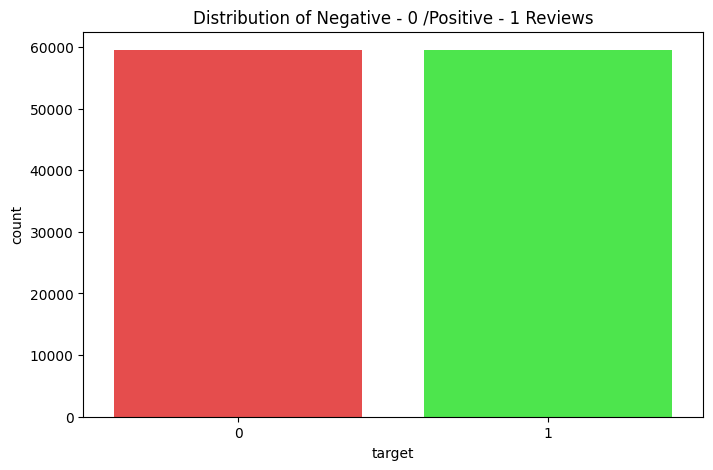

In [37]:
# Examing the distribution of 
plt.figure(figsize = (8,5))
sns.countplot(x = df3['target'],palette=["#FF0000", "#00FF00"], alpha = 0.8)
plt.title('Distribution of Negative - 0 /Positive - 1 Reviews')

Now, you as will observe in the above histagram,  the classes in the outcome attribute are now balanced 

Text(0.5, 1.0, 'Distribution of the Review Words count')

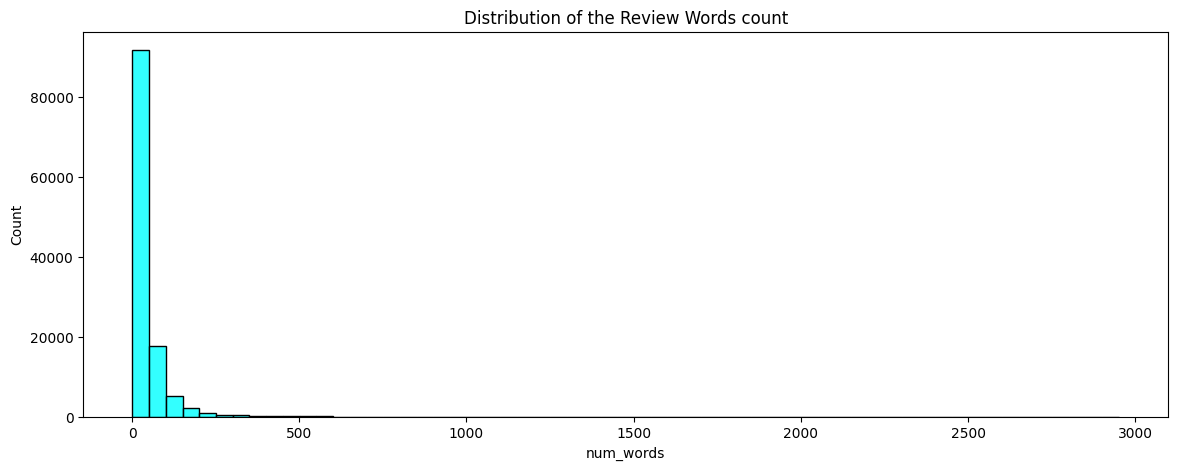

In [38]:
plt.figure(figsize = (14,5))
# Create the histogram with the new default color palette
sns.histplot(df3['num_words'], bins=range(1, 3000, 50), alpha=0.8, color='aqua')
plt.title('Distribution of the Review Words count')

### 1.3 Defining the Model

In [39]:
#define the LSTM model
MAX_LEN = 100

def get_model():
    dropout_rate = 0.2

    input_ids = Input(shape = (MAX_LEN,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (MAX_LEN,), dtype = tf.int32, name = 'input_mask')

    embeddings = bert([input_ids, input_mask])[1] #pooler output
    print(embeddings)

    out = Dropout(0.2)(embeddings)
    
    #64 units dense layer
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)

    y = Dense(1,activation = 'sigmoid')(out)
    
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True
    
    #define optimizer
    optimizer = Adam(learning_rate=1e-05, epsilon=1e-08,decay=0.01,clipnorm=1.0)
  
    #complile the model
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    
    return model

#define tokenization function
def get_tokens(X):
    
    X = tokenizer(
                text = list(X),
                add_special_tokens = True,
                max_length = MAX_LEN,
                truncation = True,
                padding = True,
                return_tensors = 'tf',
                return_token_type_ids = False,
                return_attention_mask = True,
                verbose = True
                )
    
    return X

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf_bert_model/bert/pooler/dense/Tanh:0', description="created by layer 'tf_bert_model'")


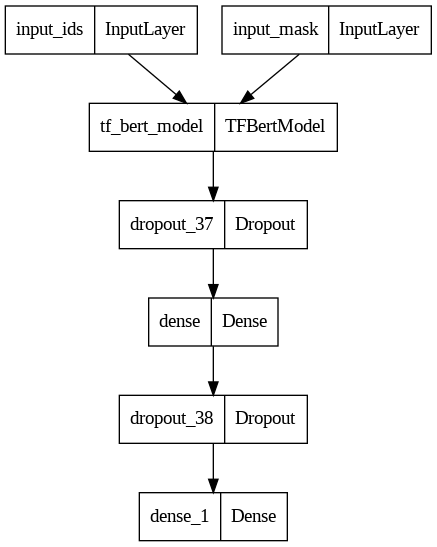

In [40]:
#plot the model architecture
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

model = get_model()
tf.keras.utils.plot_model(model)

**Split the dataframe into training and testing datasets**

In [41]:
#split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = SEED)

### 1.4 Training the Model

In [42]:
X_train_seq = get_tokens(X_train)
X_test_seq = get_tokens(X_test)

history = model.fit(x = {'input_ids':X_train_seq['input_ids'],'input_mask':X_train_seq['attention_mask']}, 
                    y = y_train, epochs=10,
                    validation_split = 0.2, batch_size = 32, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)])

Epoch 1/10
2380/2380 [==============================] - 257s 98ms/step - loss: 0.2988 - accuracy: 0.8771 - val_loss: 0.2435 - val_accuracy: 0.9058
Epoch 2/10
2380/2380 [==============================] - 230s 97ms/step - loss: 0.2473 - accuracy: 0.9052 - val_loss: 0.2373 - val_accuracy: 0.9087
Epoch 3/10
2380/2380 [==============================] - 230s 97ms/step - loss: 0.2379 - accuracy: 0.9097 - val_loss: 0.2345 - val_accuracy: 0.9096
Epoch 4/10
2380/2380 [==============================] - 230s 97ms/step - loss: 0.2331 - accuracy: 0.9108 - val_loss: 0.2316 - val_accuracy: 0.9109
Epoch 5/10
2380/2380 [==============================] - 230s 96ms/step - loss: 0.2292 - accuracy: 0.9128 - val_loss: 0.2309 - val_accuracy: 0.9109
Epoch 6/10
2380/2380 [==============================] - 230s 97ms/step - loss: 0.2277 - accuracy: 0.9141 - val_loss: 0.2293 - val_accuracy: 0.9118
Epoch 7/10
2380/2380 [==============================] - 229s 96ms/step - loss: 0.2267 - accuracy: 0.9138 - val_loss: 0

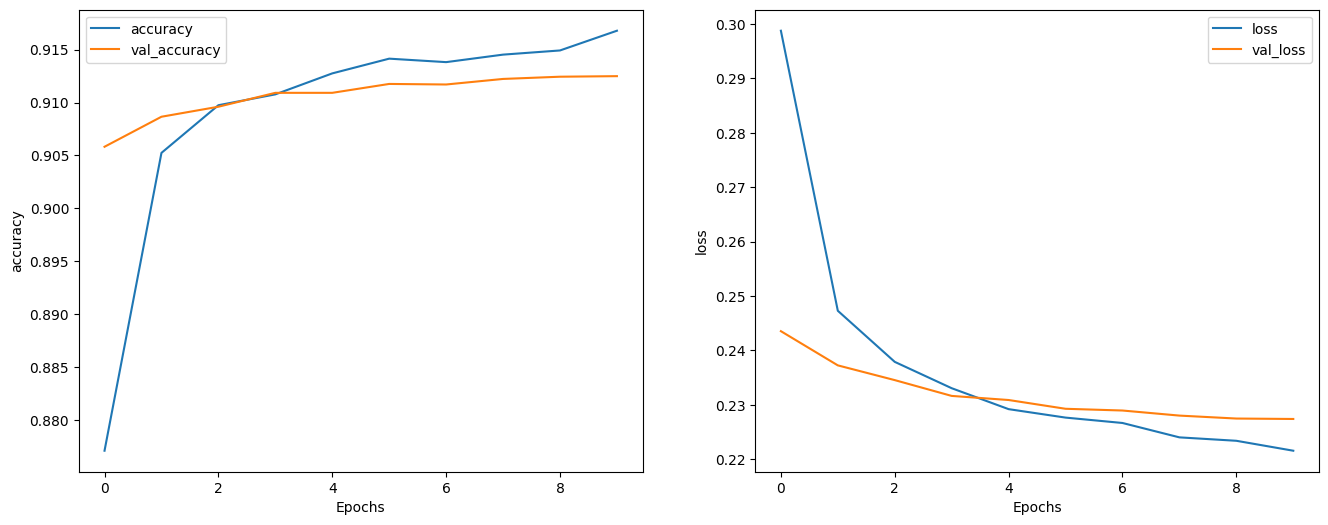

In [43]:
#plot the train/validation loss and accuracy
def plot_graphs(history, metric):
    
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

### 1.5 Evaluating the Model

In [44]:
#predict the test set labels
yhat =  np.where(model.predict({'input_ids':X_test_seq['input_ids'],'input_mask':X_test_seq['attention_mask']}) >=0.5,1,0)

744/744 [==============================] - 29s 34ms/step


In [45]:
## print classification report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     11902
           1       0.92      0.90      0.91     11896

    accuracy                           0.91     23798
   macro avg       0.91      0.91      0.91     23798
weighted avg       0.91      0.91      0.91     23798



Text(70.72222222222221, 0.5, 'Real Labels')

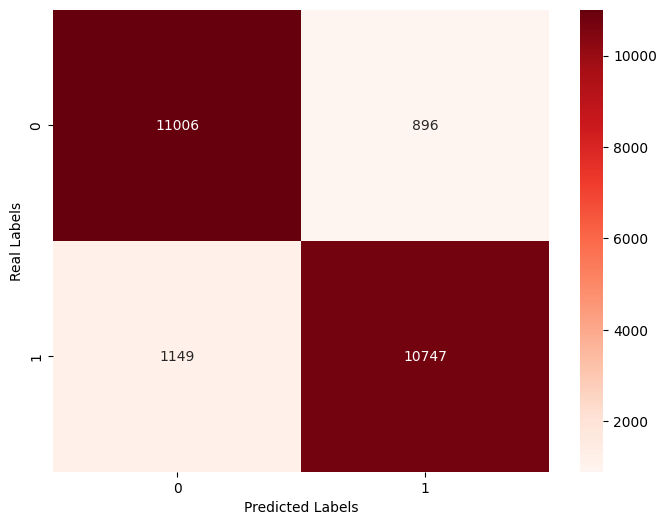

In [46]:
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,yhat), annot=True, 
            fmt='', cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [48]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

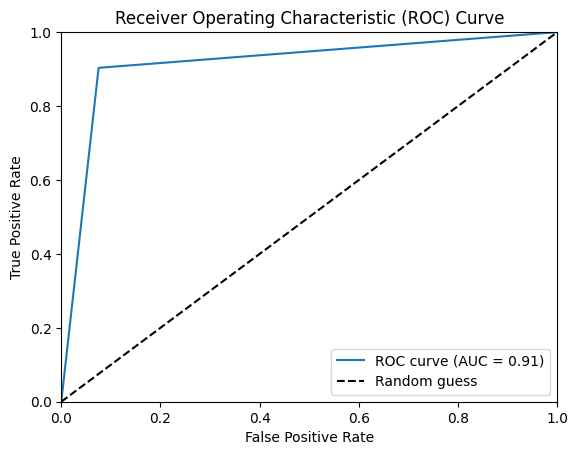

In [49]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()